## Objectives
Perform KNN-based collaborative filtering on the user-item interaction matrix

### Load and exploring dataset

In [19]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv("ratings.csv")
df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This matrix is presented as the dense or vertical form, and you may convert it to a sparse
matrix using pivot :

In [13]:
rating_sparse_df = df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
0,2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
2,5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


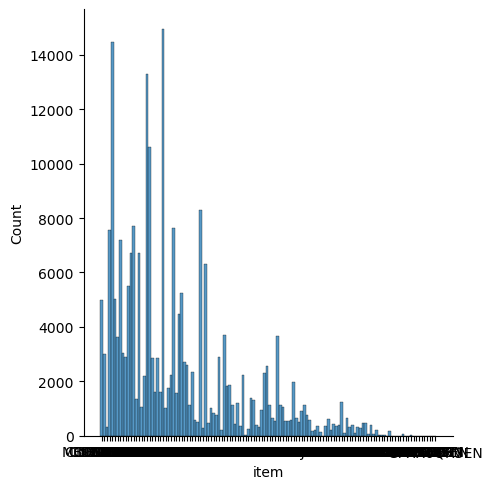

In [21]:
sns.displot(df['item'])

## Perform KNN-based collaborative filtering on the user-item interaction matrix. 

You must implement the two following options of KNN-based collaborative filtering:

1. Use scikit-surprise which is a popular and easy-to-use Python recommendation system library.

2. Implement it with standard numpy, pandas, and sklearn. You may need to write a lot of low-level implementation code along the way.

### Implementation Option 1: Use Surprise library
Surprise is a Python sci-kit library for recommender systems. It is simple and comprehensive to build
and test different recommendation algorithms.

In [4]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [22]:
df.to_csv("course_ratings.csv", index=False)
# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

coruse_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

trainset, testset = train_test_split(coruse_dataset, test_size=0.3)

print(f"Total {trainset.n_users} users and {trainset.n_items} items in the trainingset")

Total 31352 users and 123 items in the trainingset


As you can see, just a couple of lines and you can apply KNN collaborative filtering on the sample
movie lens dataset. The main evaluation metric is Root Mean Square Error (RMSE) which is a very
popular rating estimation error metric used in recommender systems as well as many regression
model evaluations.

### TASK: Perform KNN-based collaborative filtering on the user-item interaction matrix
TODO: Fit the KNN-based collaborative filtering model using the trainset and evaluate the results
using the testset:

In [ ]:
# - Define a KNNBasic() model
# Note there are some arguments such as:
# max_k and min_k, representing the max and min number of neighors for rating estimations
# sim_option, representing similarity measurement such as cosine and whether you want it to be user_based or items_based 
# e.g., sim_option = {
#        'name': 'cosine', 'user_based': False,
#    }
#
# more KNN model hyperparamets can be found here:
# https://surprise.readthedocs.io/en/stable/knn_inspired.html
# 
# You may try different hyperparamet combinations to see which one has the best performance


# - Train the KNNBasic model on the trainset, and predict ratings for the testset

# - Then compute RMSE

In [9]:
from surprise import KNNBasic, Dataset, Reader

In [17]:
knn_algorithm = KNNBasic(k=40, min_k=1, sim_options={'name': 'cosine', 'user_based': False}, verbose=False, 
                     centered=False, mean_centered=True)
knn_algorithm.fit(trainset)

predictions = knn_algorithm.test(testset)

for prediction in predictions[:5]:
    print(f"User {prediction.uid} will rate item {prediction.iid} with predicted rating: {prediction.est}")
rmse = accuracy.rmse(predictions)
print('RMSE:', rmse)

User 338722 will rate item BD0101EN with predicted rating: 3
User 1891709 will rate item BD0101EN with predicted rating: 2.999999999999999
User 424689 will rate item CB0103EN with predicted rating: 2.952508664290875
User 921446 will rate item ML0122ENv1 with predicted rating: 2.952508664290875
User 785365 will rate item BD0101EN with predicted rating: 3
RMSE: 0.1916
RMSE: 0.19162183032551156




Định nghĩa thuật toán KNNBasic:

- k=40: Số lượng hàng xóm cần xem xét để thực hiện dự đoán.
- min_k=1: Số lượng tối thiểu hàng xóm cần có để thực hiện dự đoán.
- sim_options: Tùy chọn đo độ tương tự cho thuật toán. Ở đây, nó sử dụng đo độ tương tự cosine và lọc cộng tác dựa trên item (vì user_based được đặt thành False).
- verbose=False: Đặt verbose thành False để không in thông tin tiến trình trong quá trình huấn luyện.
- centered=False: Xem xét liệu dữ liệu đã được căn chỉnh (trừ đi giá trị trung bình của người dùng/item).
- mean_centered=True: Xem xét liệu dữ liệu đã được chuẩn hóa bằng cách trừ đi giá trị trung bình toàn cục.

Huấn luyện thuật toán trên tập huấn luyện (trainset).

Thực hiện dự đoán trên tập kiểm tra (testset) bằng cách sử dụng thuật toán đã được huấn luyện.

In ra 5 dự đoán hàng đầu cùng với xếp hạng ước tính.

Tính và in ra giá trị RMSE bằng phương thức accuracy.rmse().

Điểm RMSE đạt giá trị 0.1894, đây là giá trị đo lường sai số trung bình giữa các giá trị đánh giá thực tế và giá trị dự đoán của thuật toán. Giá trị RMSE càng thấp, thì độ chính xác của mô hình lọc cộng tác càng cao.


### Using KNN for ml-100k dataset

In [23]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k', prompt=False)


In [24]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)
# We&#39;ll use the famous KNNBasic algorithm.
algo = KNNBasic()
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)
# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9841


0.9841110546431414

In [26]:
# Load the dataset
data = Dataset.load_builtin('ml-100k')

# Split the dataset into trainset and testset
trainset, testset = train_test_split(data, test_size=0.25)

# Define the KNNBasic model
knn_model = KNNBasic(k=40, min_k=1, sim_options={'name': 'cosine', 'user_based': False}, verbose=False, 
                     centered=False, mean_centered=True)

# Train the model on the trainset
knn_model.fit(trainset)

# Predict ratings for the testset
predictions = knn_model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print('RMSE:', rmse)

RMSE: 1.0263
RMSE: 1.0262724947890096
